In [33]:
import numpy as np
import matplotlib.pyplot as plt
import cooltools.lib.plotting

In [34]:
flank = 100_000
resolution = 1000
strain_A_name = 'rec8-14D'
strain_B_name = 'rec8-24A'

In [35]:
strain_A_mtx = np.loadtxt('intermediate/' + strain_A_name + '.csv', delimiter=',', dtype=float, skiprows=1)
strain_B_mtx = np.loadtxt('intermediate/' + strain_B_name + '.csv', delimiter=',', dtype=float, skiprows=1)
ratio_mtx = np.divide(strain_A_mtx, strain_B_mtx)
ratio_mtx = np.nan_to_num(ratio_mtx)
print(ratio_mtx)

[[0.         0.         0.80713199 ... 1.36450096 0.21565992 0.72792358]
 [0.         0.         0.         ... 1.06020107 1.50264193 1.17916117]
 [0.80713199 0.         0.         ... 0.96054408 0.38759723 0.43921382]
 ...
 [1.36450096 1.06020107 0.96054408 ... 0.         0.         0.96289072]
 [0.21565992 1.50264193 0.38759723 ... 0.         0.         0.        ]
 [0.72792358 1.17916117 0.43921382 ... 0.96289072 0.         0.        ]]


/var/folders/sx/cg2lr_vj0x387p3v3l2qbp080000gn/T/ipykernel_31450/2907232447.py:3: RuntimeWarning: invalid value encountered in divide
  ratio_mtx = np.divide(strain_A_mtx, strain_B_mtx)


/var/folders/sx/cg2lr_vj0x387p3v3l2qbp080000gn/T/ipykernel_31450/3903852766.py:2: RuntimeWarning: divide by zero encountered in log2
  np.log2(ratio_mtx),


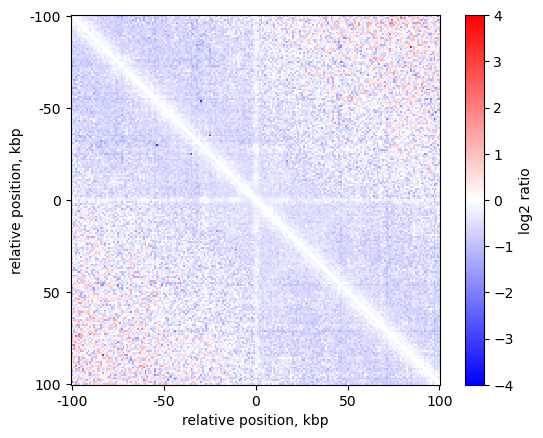

In [36]:
plt.imshow(
    np.log2(ratio_mtx),
    vmin = -4,
    vmax = 4,
    cmap='bwr',
    interpolation='none')

plt.colorbar(label = 'log2 ratio')
ticks_pixels = np.linspace(0, flank*2//resolution, 5)
ticks_kbp = ((ticks_pixels-ticks_pixels[-1]/2)*resolution//1000).astype(int)
plt.xticks(ticks_pixels, ticks_kbp)
plt.yticks(ticks_pixels, ticks_kbp)
plt.xlabel('relative position, kbp')
plt.ylabel('relative position, kbp')

plt.savefig('figures/cen_pileup_log2ratio_' + strain_A_name + '_' + strain_B_name + '.png', dpi=300)
plt.show()